You work for Giant Eagle and you have collected sales data for different products across different Giant Eagles in different cities.  Your goal is to build a predictive model to predict the sales of each product. Below are the variables you have in your dataset.

* 'Product_Identifier': Unique product ID
* 'Product_Weight': Weight of product
* 'Product_Fat_Content': Whether the product is low fat or not
* 'Product_Visibility': The % of total display area of all products in a store allocated to the particular product
* 'Product_Type': The category to which the product belongs
* 'Product_MRP': Maximum Retail Price (list price) of the product
* 'Outlet_Identifier': Unique store ID
* 'Outlet_Establishment_Year': The year in which store was established
* 'Outlet_Size': The size of the store in terms of ground area
* 'Outlet_Location_Type': The type of city in which the store is located
* 'Outlet_Type': Whether the outlet is just a grocery store or some sort of supermarket
* 'Product_Outlet_Sales': Sales of the product in the particular store. This is the outcome variable to be predicted.

You want to run your model 1) with all the features and 2) with the lowest possible number of features that still explains (99% to 100%) of variance. Do not drop any variables other than Product Identifier and at the end of your code, compare the performance the two models you created and how you determined the number of features to keep in the second model.

Please save your file as Assignment4_LastName.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('Sales.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Identifier         8523 non-null   object 
 1   Product_Weight             7060 non-null   float64
 2   Product_Fat_Content        8523 non-null   object 
 3   Product_Visibility         8523 non-null   float64
 4   Product_Type               8523 non-null   object 
 5   Product_MRP                8523 non-null   float64
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Product_Outlet_Sales       8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [4]:
dataset.head()

,Product_Identifier,Product_Weight,Product_Fat_Content,Product_Visibility,Product_Type,Product_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Product_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
dataset.describe()

,Product_Weight,Product_Visibility,Product_MRP,Outlet_Establishment_Year,Product_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
dataset.drop(columns=['Product_Identifier'], inplace=True)

In [7]:
dataset.keys()

Index(['Product_Weight', 'Product_Fat_Content', 'Product_Visibility',
       'Product_Type', 'Product_MRP', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Product_Outlet_Sales'],
      dtype='object')

In [8]:
mean_weight = dataset["Product_Weight"].mean()
dataset["Product_Weight"].fillna(mean_weight, inplace=True)

In [9]:
most_common_outlet_size = dataset['Outlet_Size'].mode()

In [10]:
dataset['Outlet_Size'].fillna(most_common_outlet_size[0], inplace=True)

In [11]:
dataset.isnull().sum()

Product_Weight               0
Product_Fat_Content          0
Product_Visibility           0
Product_Type                 0
Product_MRP                  0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Product_Outlet_Sales         0
dtype: int64

<Axes: >

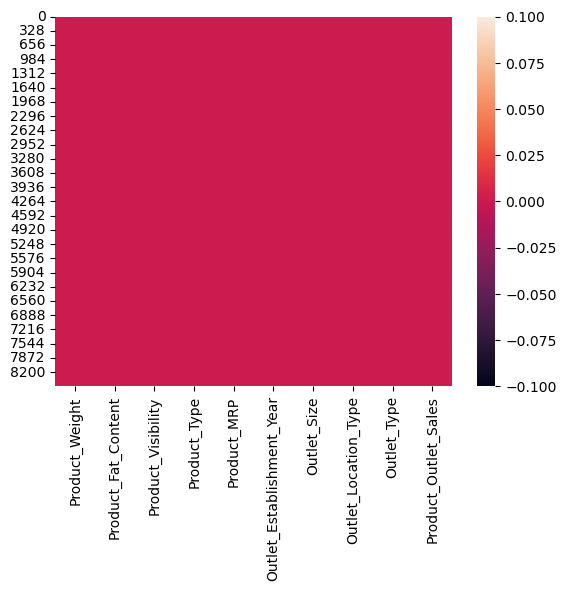

In [12]:
sns.heatmap(dataset.isna())

In [13]:
dataset1=pd.get_dummies(dataset)

In [14]:
X = dataset1.drop(["Product_Outlet_Sales"], axis=1)
y = dataset1["Product_Outlet_Sales"]

In [15]:
X.head()

,Product_Weight,Product_Visibility,Product_MRP,Outlet_Establishment_Year,Product_Fat_Content_LF,Product_Fat_Content_Low Fat,Product_Fat_Content_Regular,Product_Fat_Content_low fat,Product_Fat_Content_reg,Product_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,0,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler


In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model 1 with all features

In [20]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 2)

In [21]:
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [22]:
predictions = knn.predict(X_test)

In [23]:
from sklearn import metrics

print("MAE", metrics.mean_absolute_error(y_test,predictions))
print("MSE", metrics.mean_squared_error(y_test,predictions)) 
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE 939.1345251612903
MSE 1768654.4481443567
RMSE 1329.9076840684681


In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': list(range(1,29)), 'metric': ["euclidean", "manhattan"]}

In [25]:
grid = GridSearchCV(KNeighborsRegressor(), param_grid, verbose =3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV 1/5] END ...metric=euclidean, n_neighbors=1;, score=0.109 total time=   0.0s
[CV 2/5] END ...metric=euclidean, n_neighbors=1;, score=0.201 total time=   0.0s
[CV 3/5] END ...metric=euclidean, n_neighbors=1;, score=0.134 total time=   0.0s
[CV 4/5] END ...metric=euclidean, n_neighbors=1;, score=0.145 total time=   0.1s
[CV 5/5] END ...metric=euclidean, n_neighbors=1;, score=0.123 total time=   0.1s
[CV 1/5] END ...metric=euclidean, n_neighbors=2;, score=0.323 total time=   0.0s
[CV 2/5] END ...metric=euclidean, n_neighbors=2;, score=0.326 total time=   0.0s
[CV 3/5] END ...metric=euclidean, n_neighbors=2;, score=0.319 total time=   0.1s
[CV 4/5] END ...metric=euclidean, n_neighbors=2;, score=0.326 total time=   0.1s
[CV 5/5] END ...metric=euclidean, n_neighbors=2;, score=0.276 total time=   0.1s
[CV 1/5] END ...metric=euclidean, n_neighbors=3;, score=0.392 total time=   0.1s
[CV 2/5] END ...metric=euclidean, n_neighbors=3

[CV 2/5] END ..metric=euclidean, n_neighbors=21;, score=0.408 total time=   0.1s
[CV 3/5] END ..metric=euclidean, n_neighbors=21;, score=0.391 total time=   0.1s
[CV 4/5] END ..metric=euclidean, n_neighbors=21;, score=0.392 total time=   0.1s
[CV 5/5] END ..metric=euclidean, n_neighbors=21;, score=0.384 total time=   0.1s
[CV 1/5] END ..metric=euclidean, n_neighbors=22;, score=0.408 total time=   0.1s
[CV 2/5] END ..metric=euclidean, n_neighbors=22;, score=0.403 total time=   0.1s
[CV 3/5] END ..metric=euclidean, n_neighbors=22;, score=0.390 total time=   0.1s
[CV 4/5] END ..metric=euclidean, n_neighbors=22;, score=0.386 total time=   0.1s
[CV 5/5] END ..metric=euclidean, n_neighbors=22;, score=0.381 total time=   0.1s
[CV 1/5] END ..metric=euclidean, n_neighbors=23;, score=0.403 total time=   0.1s
[CV 2/5] END ..metric=euclidean, n_neighbors=23;, score=0.396 total time=   0.1s
[CV 3/5] END ..metric=euclidean, n_neighbors=23;, score=0.386 total time=   0.1s
[CV 4/5] END ..metric=euclid

[CV 4/5] END ..metric=manhattan, n_neighbors=13;, score=0.439 total time=   0.3s
[CV 5/5] END ..metric=manhattan, n_neighbors=13;, score=0.419 total time=   0.3s
[CV 1/5] END ..metric=manhattan, n_neighbors=14;, score=0.432 total time=   0.3s
[CV 2/5] END ..metric=manhattan, n_neighbors=14;, score=0.427 total time=   0.3s
[CV 3/5] END ..metric=manhattan, n_neighbors=14;, score=0.429 total time=   0.3s
[CV 4/5] END ..metric=manhattan, n_neighbors=14;, score=0.432 total time=   0.4s
[CV 5/5] END ..metric=manhattan, n_neighbors=14;, score=0.416 total time=   0.3s
[CV 1/5] END ..metric=manhattan, n_neighbors=15;, score=0.427 total time=   0.3s
[CV 2/5] END ..metric=manhattan, n_neighbors=15;, score=0.433 total time=   0.3s
[CV 3/5] END ..metric=manhattan, n_neighbors=15;, score=0.425 total time=   0.3s
[CV 4/5] END ..metric=manhattan, n_neighbors=15;, score=0.431 total time=   0.3s
[CV 5/5] END ..metric=manhattan, n_neighbors=15;, score=0.415 total time=   0.2s
[CV 1/5] END ..metric=manhat

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28]},
             verbose=3)

In [26]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 8}

In [27]:
grid_predictions = grid.best_estimator_.predict(X_test)

In [28]:
print("MAE", metrics.mean_absolute_error(y_test,grid_predictions))
print("MSE", metrics.mean_squared_error(y_test,grid_predictions)) 
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test,grid_predictions)))

MAE 868.984636378299
MSE 1422448.9611783114
RMSE 1192.664647408613


### Model 2 with the lowest possible number of features that still explains (99% to 100%) of variance

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA(n_components = None)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [31]:
explained_variance

array([9.40220561e-02, 7.43636824e-02, 6.28317730e-02, 5.32897640e-02,
       3.95076295e-02, 3.43169273e-02, 3.35934272e-02, 3.34195795e-02,
       3.25040998e-02, 3.22045891e-02, 3.16007052e-02, 3.14204074e-02,
       3.11749933e-02, 3.07650395e-02, 3.06106502e-02, 3.00694972e-02,
       2.99158930e-02, 2.95113791e-02, 2.93556737e-02, 2.88746976e-02,
       2.86898330e-02, 2.84069843e-02, 2.79414453e-02, 2.63430450e-02,
       2.54829987e-02, 2.51882212e-02, 2.10345841e-02, 2.01212432e-02,
       3.22009736e-03, 2.19083778e-04, 1.85425811e-32, 1.66785408e-33,
       1.39046051e-33, 1.00025835e-33, 7.13652553e-34])

In [32]:
explained_variance.sum()

1.0

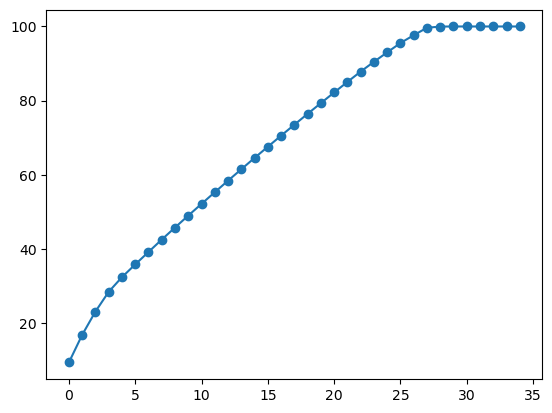

In [33]:
var1=np.cumsum(explained_variance*100)
plt.plot(var1,  marker='o')

In [34]:
X_train.shape

(6818, 35)

In [35]:
X_train_pca.shape

(6818, 35)

In [36]:
pca = PCA(n_components = 28)
X_train2 = pca.fit_transform(X_train_pca)
X_test2 = pca.transform(X_test_pca)
explained_variance = pca.explained_variance_ratio_

In [37]:
explained_variance

array([0.09402206, 0.07436368, 0.06283177, 0.05328976, 0.03950763,
       0.03431693, 0.03359343, 0.03341958, 0.0325041 , 0.03220459,
       0.03160071, 0.03142041, 0.03117499, 0.03076504, 0.03061065,
       0.0300695 , 0.02991589, 0.02951138, 0.02935567, 0.0288747 ,
       0.02868983, 0.02840698, 0.02794145, 0.02634304, 0.025483  ,
       0.02518822, 0.02103458, 0.02012124])

In [38]:
explained_variance.sum()

0.9965608188656655

In [39]:
df_comp = pd.DataFrame(pca.components_,columns=X.columns)

<Axes: >

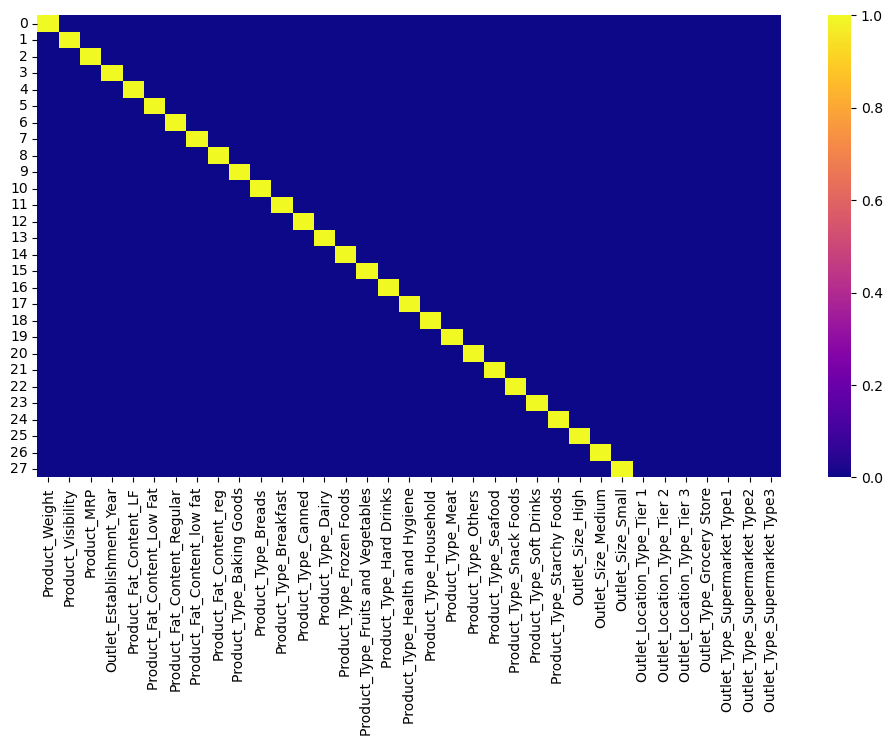

In [40]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [41]:
knn = KNeighborsRegressor(n_neighbors = 2)

In [42]:
knn.fit(X_train2,y_train)

KNeighborsRegressor(n_neighbors=2)

In [43]:
predictions2 = knn.predict(X_test2)

In [44]:
print("MAE", metrics.mean_absolute_error(y_test,predictions2))
print("MSE", metrics.mean_squared_error(y_test,predictions2)) 
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test,predictions2)))

MAE 941.0155565982404
MSE 1769609.3917866324
RMSE 1330.2666619090446


In [45]:
param_grid = {'n_neighbors': list(range(1,29)), 'metric': ["euclidean", "manhattan"]}

In [46]:
grid = GridSearchCV(KNeighborsRegressor(), param_grid, verbose =3)
grid.fit(X_train2,y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV 1/5] END ...metric=euclidean, n_neighbors=1;, score=0.120 total time=   0.1s
[CV 2/5] END ...metric=euclidean, n_neighbors=1;, score=0.205 total time=   0.0s
[CV 3/5] END ...metric=euclidean, n_neighbors=1;, score=0.125 total time=   0.0s
[CV 4/5] END ...metric=euclidean, n_neighbors=1;, score=0.143 total time=   0.0s
[CV 5/5] END ...metric=euclidean, n_neighbors=1;, score=0.115 total time=   0.1s
[CV 1/5] END ...metric=euclidean, n_neighbors=2;, score=0.325 total time=   0.1s
[CV 2/5] END ...metric=euclidean, n_neighbors=2;, score=0.332 total time=   0.0s
[CV 3/5] END ...metric=euclidean, n_neighbors=2;, score=0.319 total time=   0.0s
[CV 4/5] END ...metric=euclidean, n_neighbors=2;, score=0.324 total time=   0.0s
[CV 5/5] END ...metric=euclidean, n_neighbors=2;, score=0.275 total time=   0.0s
[CV 1/5] END ...metric=euclidean, n_neighbors=3;, score=0.394 total time=   0.0s
[CV 2/5] END ...metric=euclidean, n_neighbors=3

[CV 2/5] END ..metric=euclidean, n_neighbors=21;, score=0.409 total time=   0.1s
[CV 3/5] END ..metric=euclidean, n_neighbors=21;, score=0.392 total time=   0.1s
[CV 4/5] END ..metric=euclidean, n_neighbors=21;, score=0.392 total time=   0.1s
[CV 5/5] END ..metric=euclidean, n_neighbors=21;, score=0.384 total time=   0.0s
[CV 1/5] END ..metric=euclidean, n_neighbors=22;, score=0.410 total time=   0.2s
[CV 2/5] END ..metric=euclidean, n_neighbors=22;, score=0.403 total time=   0.1s
[CV 3/5] END ..metric=euclidean, n_neighbors=22;, score=0.391 total time=   0.1s
[CV 4/5] END ..metric=euclidean, n_neighbors=22;, score=0.386 total time=   0.0s
[CV 5/5] END ..metric=euclidean, n_neighbors=22;, score=0.381 total time=   0.2s
[CV 1/5] END ..metric=euclidean, n_neighbors=23;, score=0.404 total time=   0.1s
[CV 2/5] END ..metric=euclidean, n_neighbors=23;, score=0.396 total time=   0.1s
[CV 3/5] END ..metric=euclidean, n_neighbors=23;, score=0.385 total time=   0.2s
[CV 4/5] END ..metric=euclid

[CV 4/5] END ..metric=manhattan, n_neighbors=13;, score=0.443 total time=   0.2s
[CV 5/5] END ..metric=manhattan, n_neighbors=13;, score=0.410 total time=   0.2s
[CV 1/5] END ..metric=manhattan, n_neighbors=14;, score=0.447 total time=   0.2s
[CV 2/5] END ..metric=manhattan, n_neighbors=14;, score=0.449 total time=   0.3s
[CV 3/5] END ..metric=manhattan, n_neighbors=14;, score=0.429 total time=   0.2s
[CV 4/5] END ..metric=manhattan, n_neighbors=14;, score=0.436 total time=   0.3s
[CV 5/5] END ..metric=manhattan, n_neighbors=14;, score=0.403 total time=   0.2s
[CV 1/5] END ..metric=manhattan, n_neighbors=15;, score=0.442 total time=   0.3s
[CV 2/5] END ..metric=manhattan, n_neighbors=15;, score=0.443 total time=   0.3s
[CV 3/5] END ..metric=manhattan, n_neighbors=15;, score=0.430 total time=   0.3s
[CV 4/5] END ..metric=manhattan, n_neighbors=15;, score=0.435 total time=   0.3s
[CV 5/5] END ..metric=manhattan, n_neighbors=15;, score=0.408 total time=   0.2s
[CV 1/5] END ..metric=manhat

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28]},
             verbose=3)

In [47]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 7}

In [48]:
grid_predictions2 = grid.best_estimator_.predict(X_test2)

In [49]:
print("MAE", metrics.mean_absolute_error(y_test,grid_predictions2))
print("MSE", metrics.mean_squared_error(y_test,grid_predictions2)) 
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test,grid_predictions2)))

MAE 878.1453484541265
MSE 1467524.5647690904
RMSE 1211.414282881414


### Conclusion

The initial model, utilizing all features, exhibited a faster rate of RMSE decrease compared to the second model, which employed only the minimum necessary features.

After plotting the cumulative sum of explained variance, it became evident that by incorporating the 28th component, the cumulative explained variance reached close to 99%. Subsequently, a detailed examination utilizing 28 components confirmed that the cumulative explained variance stood at an impressive 99.65 percent.
